# Análisis exploratorio de incidencia delictiva en México

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df = pd.read_csv('data/delitos.csv')

#### Ejercicio 1: Elige 3 estados de la república y grafica una serie de tiempo de la frecuencia abosluta de homicidios dolosos de enero 2015 a julio 2019 en estas tres entidades

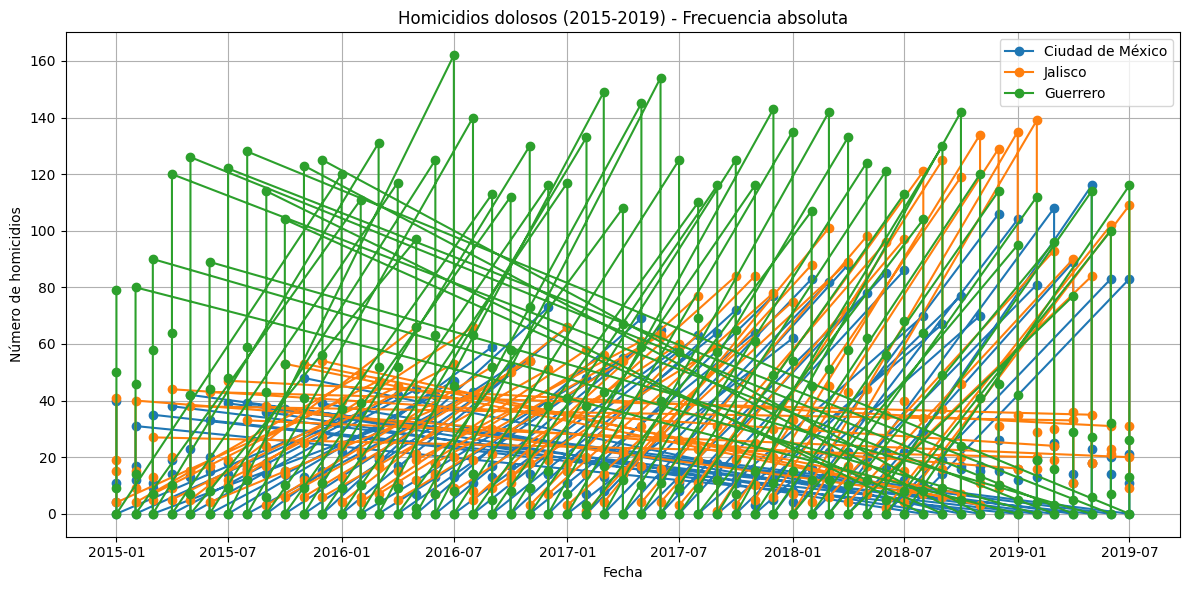

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/datos_delitos.csv', encoding='latin-1')

df_hom = df[
    (df['Tipo de delito'] == 'Homicidio') &
    (df['Subtipo de delito'] == 'Homicidio doloso')
]

estados = ['Ciudad de México', 'Jalisco', 'Guerrero']
df_hom = df_hom[df_hom['Entidad'].isin(estados)]

df_long = df_hom.melt(
    id_vars=['Año', 'Entidad'],
    value_vars=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio',
                'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
    var_name='Mes',
    value_name='Homicidios'
)

meses_map = {
    'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4, 'Mayo': 5, 'Junio': 6,
    'Julio': 7, 'Agosto': 8, 'Septiembre': 9, 'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12
}

df_long['Mes_num'] = df_long['Mes'].map(meses_map)

df_long['Fecha'] = pd.to_datetime(dict(year=df_long['Año'], month=df_long['Mes_num'], day=1))

mask = (df_long['Fecha'] >= '2015-01-01') & (df_long['Fecha'] <= '2019-07-31')
df_long = df_long[mask]

plt.figure(figsize=(12, 6))
for estado in estados:
    datos_estado = df_long[df_long['Entidad'] == estado]
    plt.plot(datos_estado['Fecha'], datos_estado['Homicidios'], marker='o', label=estado)

plt.title('Homicidios dolosos (2015-2019) - Frecuencia absoluta')
plt.xlabel('Fecha')
plt.ylabel('Número de homicidios')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Ejercicio 2: Contetas las siguientes  preguntas:
1. ¿Cuántos homicidios dolosos hubo en Colima en el 2018?
2. ¿Cuantos robos de vehículo automotor ha habido en el 2019?
3. Obten la suma de homicidos dolosos y feminidios en toda la República Mexicana en cada año.
4. ¿En qué mes y en qué municipio ha ocurrido el mayor número de feminicidios?
5. ¿En qué año y en qué estado ha ocurrido el mayor número de feminicidios?

In [13]:
import pandas as pd

df = pd.read_csv('./data/datos_delitos.csv', encoding='latin-1')

df_long = df.melt(
    id_vars=['Año', 'Clave_Ent', 'Entidad', 'Bien jurídico afectado',
             'Tipo de delito', 'Subtipo de delito', 'Modalidad'],
    value_vars=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio',
                'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
    var_name='Mes',
    value_name='Casos'
)

df_long['Casos'] = pd.to_numeric(df_long['Casos'], errors='coerce')

colima_2018 = df_long[
    (df_long['Entidad'] == 'Colima') &
    (df_long['Año'] == 2018) &
    (df_long['Tipo de delito'] == 'Homicidio') &
    (df_long['Subtipo de delito'] == 'Homicidio doloso')
]['Casos'].sum()

print(f"Homicidios dolosos en Colima en 2018: {colima_2018}")

robo_veh_2019 = df_long[
    (df_long['Año'] == 2019) &
    (df_long['Tipo de delito'] == 'Robo de vehículo automotor')
]['Casos'].sum()

print(f"Robos de vehículo automotor en 2019: {robo_veh_2019}")

suma_hom_fem = df_long[
    ((df_long['Tipo de delito'] == 'Homicidio') & (df_long['Subtipo de delito'] == 'Homicidio doloso')) |
    (df_long['Tipo de delito'] == 'Feminicidio')
].groupby('Año')['Casos'].sum().reset_index()

print(suma_hom_fem)

fem_max = df_long[df_long['Tipo de delito'] == 'Feminicidio']


if 'Municipio' in fem_max.columns:
    fem_max_group = fem_max.groupby(['Municipio', 'Mes'])['Casos'].sum().reset_index()
    fem_max_row = fem_max_group.loc[fem_max_group['Casos'].idxmax()]
    print(f"Mayor número de feminicidios: {fem_max_row['Casos']} en {fem_max_row['Municipio']} durante {fem_max_row['Mes']}")
else:
    fem_max_group = fem_max.groupby(['Entidad', 'Mes'])['Casos'].sum().reset_index()
    fem_max_row = fem_max_group.loc[fem_max_group['Casos'].idxmax()]
    print(f"Mayor número de feminicidios: {fem_max_row['Casos']} en {fem_max_row['Entidad']} durante {fem_max_row['Mes']}")

    fem_max_estado = fem_max.groupby(['Año', 'Entidad'])['Casos'].sum().reset_index()
fem_max_estado_row = fem_max_estado.loc[fem_max_estado['Casos'].idxmax()]

print(f"Mayor número de feminicidios: {fem_max_estado_row['Casos']} en {fem_max_estado_row['Entidad']} durante {fem_max_estado_row['Año']}")

import pandas as pd

# === 1. Cargar y transformar datos ===
df = pd.read_csv('./data/datos_delitos.csv', encoding='latin-1')

# Pasar de formato ancho (meses como columnas) a largo
df_long = df.melt(
    id_vars=['Año', 'Clave_Ent', 'Entidad', 'Bien jurídico afectado',
             'Tipo de delito', 'Subtipo de delito', 'Modalidad'],
    value_vars=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio',
                'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
    var_name='Mes',
    value_name='Casos'
)

# Asegurar que Casos sea numérico
df_long['Casos'] = pd.to_numeric(df_long['Casos'], errors='coerce')

# === 2. Responder preguntas ===

# 1) Homicidios dolosos en Colima en 2018
p1 = df_long[
    (df_long['Entidad'] == 'Colima') &
    (df_long['Año'] == 2018) &
    (df_long['Tipo de delito'] == 'Homicidio') &
    (df_long['Subtipo de delito'] == 'Homicidio doloso')
]['Casos'].sum()

# 2) Robos de vehículo automotor en 2019
p2 = df_long[
    (df_long['Año'] == 2019) &
    (df_long['Tipo de delito'] == 'Robo de vehículo automotor')
]['Casos'].sum()

# 3) Suma de homicidios dolosos y feminicidios por año
p3_df = df_long[
    ((df_long['Tipo de delito'] == 'Homicidio') & (df_long['Subtipo de delito'] == 'Homicidio doloso')) |
    (df_long['Tipo de delito'] == 'Feminicidio')
].groupby('Año')['Casos'].sum().reset_index()

# 4) Mes y municipio/estado con mayor número de feminicidios
fem_df = df_long[df_long['Tipo de delito'] == 'Feminicidio']
if 'Municipio' in fem_df.columns:
    fem_group = fem_df.groupby(['Municipio', 'Mes'])['Casos'].sum().reset_index()
    fem_max_row = fem_group.loc[fem_group['Casos'].idxmax()]
    p4 = f"{fem_max_row['Casos']} en {fem_max_row['Municipio']} durante {fem_max_row['Mes']}"
else:
    fem_group = fem_df.groupby(['Entidad', 'Mes'])['Casos'].sum().reset_index()
    fem_max_row = fem_group.loc[fem_group['Casos'].idxmax()]
    p4 = f"{fem_max_row['Casos']} en {fem_max_row['Entidad']} durante {fem_max_row['Mes']}"

# 5) Año y estado con mayor número de feminicidios
fem_estado = fem_df.groupby(['Año', 'Entidad'])['Casos'].sum().reset_index()
fem_estado_max = fem_estado.loc[fem_estado['Casos'].idxmax()]
p5 = f"{fem_estado_max['Casos']} en {fem_estado_max['Entidad']} durante {fem_estado_max['Año']}"

# === 3. Mostrar resultados ===
resumen = pd.DataFrame({
    'Pregunta': [
        '1) Homicidios dolosos en Colima en 2018',
        '2) Robos de vehículo automotor en 2019',
        '3) Suma de homicidios dolosos y feminicidios por año',
        '4) Mes y municipio/estado con mayor número de feminicidios',
        '5) Año y estado con mayor número de feminicidios'
    ],
    'Respuesta': [
        p1,
        p2,
        p3_df.to_dict(orient='records'),  # Lista de dicts con año y suma
        p4,
        p5
    ]
})

print(resumen.to_string(index=False))


Homicidios dolosos en Colima en 2018: 617.0
Robos de vehículo automotor en 2019: 0.0
    Año    Casos
0  2015  16532.0
1  2016  20756.0
2  2017  25777.0
3  2018  29995.0
4  2019  30445.0
5  2020  29786.0
6  2021  29263.0
7  2022  27240.0
8  2023  26119.0
9  2024  13255.0
Mayor número de feminicidios: 95.0 en México durante Agosto
Mayor número de feminicidios: 151.0 en México durante 2020
                                                  Pregunta                                                                                                                                                                                                                                                                                                                                  Respuesta
                   1) Homicidios dolosos en Colima en 2018                                                                                                                                                                 

#### Ejercicio 3: Haz una gráfica de pastel de tipos de delito. Deberás crear una gráfica para cada año. Utilzia la función subplots de matplotlib

C:\Users\lopez\AppData\Local\Temp\ipykernel_5268\2735328395.py:40: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


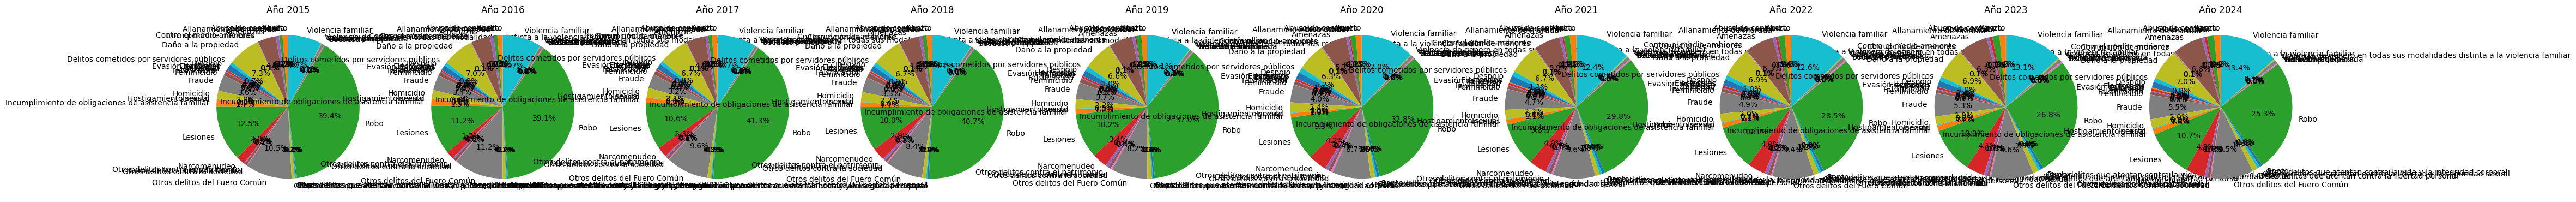

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# === 1. Cargar y transformar datos ===
df = pd.read_csv('./data/datos_delitos.csv', encoding='latin-1')

# Pasar de formato ancho a largo
df_long = df.melt(
    id_vars=['Año', 'Entidad', 'Tipo de delito', 'Subtipo de delito', 'Modalidad'],
    value_vars=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio',
                'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
    var_name='Mes',
    value_name='Casos'
)

# Asegurar que Casos sea numérico
df_long['Casos'] = pd.to_numeric(df_long['Casos'], errors='coerce')

# === 2. Agrupar por Año y Tipo de delito ===
delitos_por_año = df_long.groupby(['Año', 'Tipo de delito'])['Casos'].sum().reset_index()

# === 3. Crear subplots: una gráfica de pastel por año ===
años = sorted(delitos_por_año['Año'].unique())
fig, axes = plt.subplots(1, len(años), figsize=(5 * len(años), 6))

# Si solo hay un año, axes no es iterable
if len(años) == 1:
    axes = [axes]

for ax, año in zip(axes, años):
    datos_año = delitos_por_año[delitos_por_año['Año'] == año]
    ax.pie(
        datos_año['Casos'],
        labels=datos_año['Tipo de delito'],
        autopct='%1.1f%%',
        startangle=90
    )
    ax.set_title(f"Año {año}")

plt.tight_layout()
plt.show()

---
#### Calcula la tasa por 100,000 habitantes
##### Tasa por 100,000 habitantes
Mostrar el total de delitos en una entidad no nos sirve de mucho. Es mucho más útil calcular la tasa de incidencia delictiva por cada 100,000 habitantes

$$
tasa = \frac{delitos\space totales}{población} \times 100,000
$$

Esta tasa la podemos anualizar multiplicándola por un factor de 12
$$
tasa\space anualizada = tasa \times 12
$$

Población por entidad federativa según [la encuesta intercensal 2015](https://www.inegi.org.mx/programas/intercensal/2015/)

No tienes que descargar nada. Ya están los datos en la carpeta data

In [7]:
pobs = pd.read_csv('data/poblacion_entidades_2015.csv', encoding='iso-8859-1', sep=";")
pobs = pobs[['Cve_Entidad', 'Entidad', 'Poblacion']]
pobs = pobs.rename(columns={'Cve_Entidad':'clave_entidad', 'Entidad':'entidad', 'Poblacion':'poblacion'})
pobs.head()

,clave_entidad,entidad,poblacion
0,1,Aguascalientes,1312544.0
1,2,Baja California,3315766.0
2,3,Baja California Sur,712029.0
3,4,Campeche,899931.0
4,5,Coahuila de Zaragoza,5217908.0


In [16]:
import pandas as pd

df = pd.read_csv('./data/datos_delitos.csv', encoding='latin-1')

poblacion_data = {
    'Entidad': [
        'Aguascalientes', 'Baja California', 'Baja California Sur', 'Campeche', 'Coahuila de Zaragoza',
        'Colima', 'Chiapas', 'Chihuahua', 'Ciudad de México', 'Durango', 'Guanajuato', 'Guerrero',
        'Hidalgo', 'Jalisco', 'México', 'Michoacán de Ocampo', 'Morelos', 'Nayarit', 'Nuevo León',
        'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo', 'San Luis Potosí', 'Sinaloa', 'Sonora',
        'Tabasco', 'Tamaulipas', 'Tlaxcala', 'Veracruz de Ignacio de la Llave', 'Yucatán', 'Zacatecas'
    ],
    'Poblacion': [
        1312544, 3315766, 763929, 899931, 2954914,
        731391, 5217908, 3801487, 8851080, 1754795, 5853677, 3533251,
        2858359, 7844830, 16992418, 4748846, 1903821, 1181050, 5119503,
        3967889, 6171278, 2038372, 1501562, 2717820, 2939253, 2850330,
        2395272, 3481563, 1272847, 7886574, 2172296, 1579209
    ]
}
poblacion_df = pd.DataFrame(poblacion_data)

df_long = df.melt(
    id_vars=['Año', 'Entidad', 'Tipo de delito', 'Subtipo de delito', 'Modalidad'],
    value_vars=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio',
                'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
    var_name='Mes',
    value_name='Casos'
)
df_long['Casos'] = pd.to_numeric(df_long['Casos'], errors='coerce')

delitos_totales = df_long.groupby(['Año', 'Entidad'])['Casos'].sum().reset_index()

df_merge = delitos_totales.merge(poblacion_df, on='Entidad', how='left')

df_merge['tasa'] = (df_merge['Casos'] / df_merge['Poblacion']) * 100000
df_merge['tasa_anualizada'] = df_merge['tasa'] * 12

print(df_merge.sort_values(['Año', 'tasa_anualizada'], ascending=[True, False]))

      Año              Entidad     Casos  Poblacion         tasa  \
1    2015      Baja California  119944.0    3315766  3617.384339   
2    2015  Baja California Sur   21415.0     763929  2803.270985   
15   2015              Morelos   49245.0    1903821  2586.640236   
26   2015              Tabasco   57452.0    2395272  2398.558494   
22   2015         Quintana Roo   32496.0    1501562  2164.146402   
..    ...                  ...       ...        ...          ...   
307  2024               Oaxaca   19665.0    3967889   495.603582   
299  2024             Guerrero   13203.0    3533251   373.678519   
316  2024             Tlaxcala    1693.0    1272847   133.008916   
292  2024              Chiapas    6820.0    5217908   130.703723   
318  2024              Yucatán    2134.0    2172296    98.237073   

     tasa_anualizada  
1       43408.612067  
2       33639.251815  
15      31039.682827  
26      28782.701923  
22      25969.756827  
..               ...  
307      5947.242980  